In [19]:
import random
import csv
import numpy as np
import pandas as pd
from sklearn import preprocessing
from countryinfo import CountryInfo

# Importing plotting libraries
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import geopandas as gpd
from descartes import PolygonPatch

Summation of Province entries into single Country entries

In [20]:
# Load dataset
dataset = pd.read_csv('Q1_countrydata.csv')

# Grouping data by country and aggregating cases
dataset_grouped = dataset.groupby('Country_Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
dataset_grouped = dataset_grouped.reset_index()
dataset_grouped

,Country_Region,Confirmed,Deaths,Recovered
0,Afghanistan,51526,2191,41727
1,Albania,58991,1190,34353
2,Algeria,100159,2769,67611
3,Andorra,8166,84,7463
4,Angola,17608,407,11189
...,...,...,...,...
186,Vietnam,1482,35,1337
187,West Bank and Gaza,140287,1446,120403
188,Yemen,2101,610,1396
189,Zambia,21230,392,18942


In [21]:
# Function to retrieve population for a country
def get_population(country):
    try:
        return CountryInfo(country).population()
    except:
        return None

# Applying the function to 'Country_Region' column to get populations
dataset['Population'] = dataset['Country_Region'].apply(lambda country: get_population(country))

# Dropping rows with missing population data
dataset = dataset.dropna(subset=['Population'])
dataset



,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Population
0,NaN,Afghanistan,1/3/2021 5:22,33.939110,67.709953,51526,2191,41727,2.602310e+07
1,NaN,Albania,1/3/2021 5:22,41.153300,20.168300,58991,1190,34353,2.895947e+06
2,NaN,Algeria,1/3/2021 5:22,28.033900,1.659600,100159,2769,67611,3.870000e+07
4,NaN,Angola,1/3/2021 5:22,-11.202700,17.873900,17608,407,11189,2.438330e+07
5,NaN,Antigua and Barbuda,1/3/2021 5:22,17.060800,-61.796400,159,5,148,8.629500e+04
...,...,...,...,...,...,...,...,...,...
3975,NaN,Zambia,1/3/2021 5:22,-13.133897,27.849332,21230,392,18942,1.502332e+07
3976,NaN,Zimbabwe,1/3/2021 5:22,-19.015438,29.154857,14491,377,11363,1.306124e+07
3977,Alaska,United States,4/2/2021 15:13,60.388600,-162.890520,157,0,0,3.192590e+08
3978,Alaska,United States,4/2/2021 15:13,61.166660,-149.900000,222,3,0,3.192590e+08


Normalizing the Q1_Countrydata to extract COVID cases

In [22]:
# Normalize 'Confirmed', 'Deaths', and 'Recovered' columns by population
dataset['Confirmed'] /= dataset['Population']
dataset['Deaths'] /= dataset['Population']
dataset['Recovered'] /= dataset['Population']


# Extracting columns to normalize
columns_to_normalize = ['Confirmed', 'Deaths', 'Recovered']
values = dataset[columns_to_normalize].values        # Return the numpy representation of the 3 columns

# Apply Min-Max normalization and replace original values in the dataset
# looks at the maximum and minimum values of the data and then scales the values to a fixed range [0, 1]
# It then replaces the original values with the normalized values
dataset[columns_to_normalize] = preprocessing.MinMaxScaler().fit_transform(values)

# Fill missing values with 0
dataset.fillna(0, inplace=True)

# Extracting COVID_cases data
COVID_cases = dataset[['Confirmed', 'Deaths', 'Recovered']].values
COVID_cases

array([[2.34495645e-02, 4.67250531e-02, 2.15096384e-02],
       [2.41247339e-01, 2.28046184e-01, 1.59128892e-01],
       [3.06511234e-02, 3.97080397e-02, 2.34358858e-02],
       ...,
       [5.82403378e-06, 0.00000000e+00, 0.00000000e+00],
       [8.23525796e-06, 5.21488292e-06, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Color Mapping Schemes

In [23]:
# I tried three schemes for coloring
# 1. Using a colormap
# 2. Using a custom color scheme
# 3. Using a custom color scheme with interpolation


# Importing colormap
import matplotlib.cm as cm

# def Map_colors(value):
#     # Define colormap
#     # cmap = cm.get_cmap('viridis')  # You can choose any colormap you like
#     cmap = cm.get_cmap('summer')  # You can choose any colormap you like
#     max_value = 3
    
#     # Normalize value to range [0, 1]
#     normalized_value = value / max_value  # Assuming max_value is the maximum possible weight
    
#     # Get RGBA color tuple from the colormap
#     rgba_color = cmap(normalized_value)
    
#     # Convert RGBA to RGB
#     rgb_color = rgba_color[:3]
    
#     return rgb_color


# Custom color scheme
# def Map_colors(value):
#     if value < 0.002:
#         return [1, 1, 0.6]  # Yellow
#     elif value < 0.005:
#         return [1, 0.9, 0]  # Light Yellow
#     elif value < 0.01:
#         return [1, 0.8, 0]  # Orange
#     elif value < 0.03:
#         return [1, 0.6, 0]  # Light Orange
#     elif value < 0.06:
#         return [1, 0.4, 0]  # Dark Orange
#     elif value < 0.1:
#         return [1, 0.2, 0]  # Darker Orange
#     elif value < 0.15:
#         return [1, 0, 0]  # Red
#     elif value < 0.25:
#         return [1, 0, 0.2]  # Light Red
#     elif value < 0.35:
#         return [1, 0, 0.4]  # Dark Red
#     elif value < 0.45:
#         return [1, 0, 0.6]  # Darker Red
#     elif value < 0.55:
#         return [1, 0, 0.8]  # Very Dark Red
#     elif value < 0.65:
#         return [1, 0, 1]  # Pink
#     elif value < 0.75:
#         return [0.8, 0, 1]  # Light Pink
#     elif value < 0.9:
#         return [0.6, 0, 1]  # Purple
#     elif value < 1.05:
#         return [0.4, 0, 1]  # Dark Purple
#     elif value < 1.2:
#         return [0.2, 0, 1]  # Very Dark Purple
#     elif value < 1.4:
#         return [0, 0, 1]  # Blue
#     elif value < 1.6:
#         return [0, 0.2, 1]  # Light Blue
#     elif value < 1.8:
#         return [0, 0.4, 1]  # Dark Blue
#     elif value < 2.0:
#         return [0, 0.6, 1]  # Very Dark Blue
#     elif value < 2.2:
#         return [0, 0.8, 1]  # Cyan
#     elif value < 2.4:
#         return [0, 1, 1]  # Light Cyan
#     elif value < 2.6:
#         return [0, 1, 0.8]  # Turquoise
#     elif value < 2.8:
#         return [0, 1, 0.6]  # Light Turquoise
#     elif value < 3.0:
#         return [0, 1, 0.4]  # Dark Turquoise
#     else:
#         return [0.6, 1, 0.6]  # Light Green

# Custom color scheme with interpolation
def Map_colors(value):
    # Define color points and their corresponding values
    color_points = {
        (1, 1, 0.6): 0.002,
        (1, 0.9, 0): 0.005,
        (1, 0.8, 0): 0.01,
        (1, 0.6, 0): 0.03,
        (1, 0.4, 0): 0.06,
        (1, 0.2, 0): 0.1,
        (1, 0, 0): 0.15,
        (1, 0, 0.2): 0.25,
        (1, 0, 0.4): 0.35,
        (1, 0, 0.6): 0.45,
        (1, 0, 0.8): 0.55,
        (1, 0, 1): 0.65,
        (0.8, 0, 1): 0.75,
        (0.6, 0, 1): 0.9,
        (0.4, 0, 1): 1.05,
        (0.2, 0, 1): 1.2,
        (0, 0, 1): 1.4,
        (0, 0.2, 1): 1.6,
        (0, 0.4, 1): 1.8,
        (0, 0.6, 1): 2.0,
        (0, 0.8, 1): 2.2,
        (0, 1, 1): 2.4,
        (0, 1, 0.8): 2.6,
        (0, 1, 0.6): 2.8,
        (0, 1, 0.4): 3.0,
        (0.6, 1, 0.6): float('inf')
    }
    
    # Find the two nearest color points
    sorted_points = sorted(color_points.items(), key=lambda x: x[1])
    idx = 0
    while idx < len(sorted_points) and value > sorted_points[idx][1]:
        idx += 1
    
    # Interpolate between the two nearest color points
    if idx == 0:
        return sorted_points[0][0]
    elif idx == len(sorted_points):
        return sorted_points[-1][0]
    else:
        prev_color, prev_value = sorted_points[idx - 1]
        next_color, next_value = sorted_points[idx]
        t = (value - prev_value) / (next_value - prev_value)
        interpolated_color = [
            prev_color[i] + t * (next_color[i] - prev_color[i])
            for i in range(3)
        ]
        return interpolated_color

Convert COVID-19 cases data into a numpy array for preprocessing

In [24]:
# Initialize a numpy array with zeros to store COVID-19 cases data
data = np.zeros((dataset.shape[0], 3))

# Iterate through the dataset starting from index 1
for i in range(1, dataset.shape[0]):
    try:
        # Try to assign COVID-19 cases data to the numpy array
        data[i][0] = COVID_cases[i][0]  # Assign confirmed cases
        data[i][1] = COVID_cases[i][1]  # Assign deaths
        data[i][2] = COVID_cases[i][2]  # Assign recovered cases
    except KeyError:
        pass  # Ignore if the key doesn't exist in COVID_cases

# Remove the first row of zeros (header row) from the data
data = np.delete(data, 0, 0)

# Transpose the data array for further processing
data = data.transpose()

Findind Euclidean distance

In [25]:
def euclidean_distance(vector1, vector2):
    """
    Calculate the Euclidean distance between two vectors.

    Parameters:
        vector1 (numpy.ndarray): The first vector.
        vector2 (numpy.ndarray): The second vector.

    Returns:
        float: The Euclidean distance between the two vectors.
    """
    if len(vector1) != len(vector2):
        raise ValueError("Vectors must have the same dimensionality.")

    # Compute the squared differences between corresponding elements
    squared_diff = np.square(vector1 - vector2)
    
    # Sum the squared differences and take the square root
    distance = np.sqrt(np.sum(squared_diff))
    
    return distance

Finding Best Matching Unit for SOM

In [26]:
def find_best_matching_unit(data_point, som_map):
    """
    Find the best matching unit (BMU) in a Self-Organizing Map (SOM) for a given data point.

    Parameters:
        data_point (numpy.ndarray): The data point to find the BMU for.
        som_map (numpy.ndarray): The SOM map, where each row represents a neuron's weight vector.

    Returns:
        tuple: A tuple containing the BMU (numpy.ndarray) and its index (tuple) in the SOM map.
    """

    min_distance = float('inf')
    bmu_index = None
    
    # Iterate over each neuron in the network
    for i, row in enumerate(som_map):
        for j, neuron in enumerate(row):
            # Calculate Euclidean distance between input and current neuron
            distance = np.linalg.norm(data_point - neuron)
            if distance < min_distance:
                min_distance = distance
                bmu_index = (i, j)
    
    # Retrieve the Best Matching Unit (BMU) and its index
    bmu = som_map[bmu_index[0], bmu_index[1]]
    
    return bmu, bmu_index

Influence, Neighborhood and Weight Update Functions

In [27]:
def calc_influence(distance, radius):
    """
    Calculate the influence of a neuron on the Best Matching Unit (BMU) using a neighborhood function.

    Parameters:
        distance (float): The Manhattan distance between the neuron and the BMU.
        radius (float): The radius of the neighborhood function.

    Returns:
        float: The influence of the neuron on the BMU.
    """
    return np.exp(-(distance**2) / (2 * (radius ** 2)))

def neighborhood_function(initial_radius, i, time_constant):
    """
    Calculate the influence of a neuron on the Best Matching Unit (BMU) using a neighborhood function.

    Parameters:
        distance (float): The Manhattan distance between the neuron and the BMU.
        radius (float): The radius of the neighborhood function.
        learning_rate (float): The learning rate.

    Returns:
        float: The influence of the neuron on the BMU.
    """
    return initial_radius * np.exp(-i / time_constant)

def weight_update(weight, data_point, influence, learning_rate):
    """
    Update a neuron's weight vector in the Self-Organizing Map (SOM).

    Parameters:
        weight (numpy.ndarray): The weight vector of the neuron.
        data_point (numpy.ndarray): The data point from the input space.
        learning_rate (float): The learning rate.
        radius (float): The radius of the neighborhood function.

    Returns:
        numpy.ndarray: The updated weight vector of the neuron.
    """ 
    
    
    # Update the weight vector
    new_weight = weight + learning_rate * influence * (data_point - weight)
    # new_weight = weight + learning_rate * (data_point - weight)
    
    return new_weight

Initializing SOM

In [28]:
# Define SOM parameters
dimensions = (10, 10)  # 14 x 14 matrix
initial_radius = max(dimensions[0], dimensions[1])/2

# print(data)
# Get dimensions for raw data
m, n = data.shape
# print("m:" , m)
# print("n:" , n)

# In the weight matrix for a Self-Organizing Map (SOM):
# - The first dimension represents the rows of the SOM grid.
# - The second dimension represents the columns of the SOM grid.
# - The third dimension represents the features or dimensions of the input data.
# Each element of the weight matrix stores a weight value associated with a specific feature of a neuron's weight vector.
# Initialize the SOM map with random weights
som_map_initial = np.random.rand(dimensions[0],  dimensions[1], m)
print(som_map_initial.shape)
print("SOM MAP INITIAL:",som_map_initial)


# Train the SOM on real-world data
n_iterations = 7000  # Number of training iterations
learning_rate = 0.8  # Initial learning rate

# Initialize the time constant for radius decay
time_constant = n_iterations / np.log(initial_radius)

(10, 10, 3)
SOM MAP INITIAL: [[[4.94327244e-01 4.92497948e-01 1.72001647e-01]
  [6.48450105e-01 8.23688827e-01 3.18478006e-01]
  [4.78817653e-01 9.30519104e-01 3.34100740e-01]
  [3.99561700e-01 4.65799586e-01 2.22876644e-01]
  [2.08891940e-01 7.86397529e-01 3.17771484e-01]
  [3.83814625e-01 8.71826614e-02 4.49537390e-01]
  [8.75927582e-01 5.69368567e-01 7.64854755e-01]
  [7.70390123e-01 3.71083858e-01 7.17845870e-01]
  [2.18436602e-01 8.76850961e-01 8.48248538e-01]
  [2.45127067e-01 4.24897643e-01 6.35018796e-01]]

 [[7.56112951e-01 9.84073442e-02 2.12737859e-01]
  [8.95686489e-01 6.68854926e-01 3.47045543e-01]
  [1.17279916e-01 4.39322924e-01 5.11916086e-01]
  [9.14097637e-02 9.21570553e-01 6.85800608e-01]
  [7.75186336e-01 6.85288064e-01 7.28191853e-01]
  [3.14954339e-02 3.81157824e-01 7.97786558e-01]
  [5.79260469e-01 8.26275480e-01 8.70420623e-01]
  [1.80271829e-01 3.68732018e-01 9.45473883e-01]
  [8.92845714e-01 3.23490629e-01 9.80410189e-01]
  [8.71832127e-01 5.26395926e-01 6.001

Training SOM

In [29]:
def train_som(som_map, time_constant, data, n_iterations, learning_rate):
    """
    Train a Self-Organizing Map (SOM) on the given data.

    Parameters:
        data (numpy.ndarray): The input data for training the SOM.
        n_neurons (int): The number of neurons in the SOM.
        n_iterations (int): The number of iterations (epochs) for training.
        learning_rate (float): The learning rate.
        initial_radius (float): The initial radius of the neighborhood function.

    Returns:
        numpy.ndarray: The trained SOM map.
    """
    bmu_lst_overtime = []
    # Train the SOM
    for i in range(n_iterations):
        # Select a random data point
        rand_num = np.random.randint(1, n)
        data_point = data[:, rand_num].reshape(np.array([m, 1]))
        
        # Find the best matching unit (BMU) for the data point
        # print("Data Point:", data_point)
        # print("SOM Map:", som_map)
        bmu, bmu_index = find_best_matching_unit(data_point, som_map)
        
        # Decay the learning rate and radius
        curr_learning_rate = learning_rate * np.exp(-i / n_iterations)
        curr_radius = neighborhood_function(initial_radius, i, time_constant)
        
        for x in range(som_map.shape[0]):
            for y in range(som_map.shape[1]):
                curr_weight = som_map[x, y, :].reshape(m, 1)
                # get the distance between the current neuron and the BMU
                test_dist = np.sum((np.array([x, y]) - bmu_index) ** 2)
                # Calculate the influence of the current neuron on the BMU
                influence = calc_influence(test_dist, curr_radius)
                # checks if distance is within  radius
                if test_dist <= curr_radius**2:
                    # Update the neuron's weight vector
                    updated_weight = weight_update(curr_weight, data_point, influence, curr_learning_rate)
                    som_map[x, y, :] = updated_weight.reshape(1, 3)
                    # Tracking history of BMUs
                    if test_dist==0:
                        lsst=[]
                        lsst.append(updated_weight.reshape(1, 3)[0])
                        lsst.append(rand_num)
                        bmu_lst_overtime.append(lsst)

    
    return som_map, bmu_lst_overtime

Plotting SOM on grid

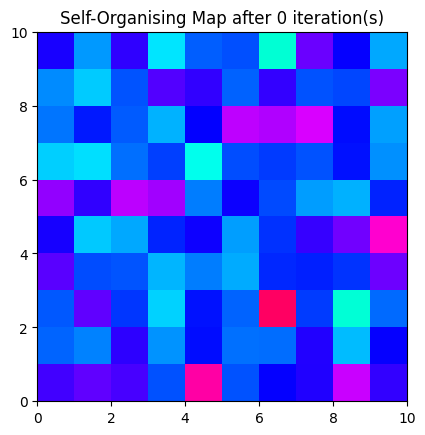

(10, 10, 3)


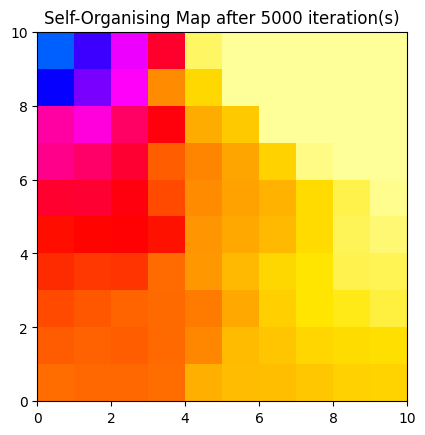

In [30]:
def plot_som(som_grid, iteration, save_path=None):
    fig, ax = plt.subplots()
    ax.set_title('Self-Organising Map after {} iteration(s)'.format(iteration))

    for i in range(som_grid.shape[0]):
        for j in range(som_grid.shape[1]):
            color_sum = np.sum(som_grid[i, j])
            cell_color = Map_colors(color_sum)
            ax.add_patch(patches.Rectangle((i, j), 1, 1, facecolor=cell_color, edgecolor='none'))

    ax.set_xlim(0, som_grid.shape[0])
    ax.set_ylim(0, som_grid.shape[1])
    ax.set_aspect('equal')

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path)

    plt.show()

# Visualize the initial SOM map and save it
initial_iteration = 0
initial_plot_path = "initial_som_map.png"
plot_som(som_map_initial, initial_iteration, save_path=initial_plot_path)

som_map_trained, bmu_list_overtime = train_som(som_map_initial, time_constant, data, n_iterations, learning_rate)
print(som_map_trained.shape)
# print("SOM MAP TRAINED:",som_map_trained)

# Visualize the SOM map after training and save it
iteration_to_visualize = 5000  # Change this to visualize the SOM map at different iterations
trained_plot_path = "trained_som_map.png"
plot_som(som_map_trained, iteration_to_visualize, save_path=trained_plot_path)

Plotting on World Map

C:\Users\Dell\AppData\Local\Temp\ipykernel_24060\703097824.py:60: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


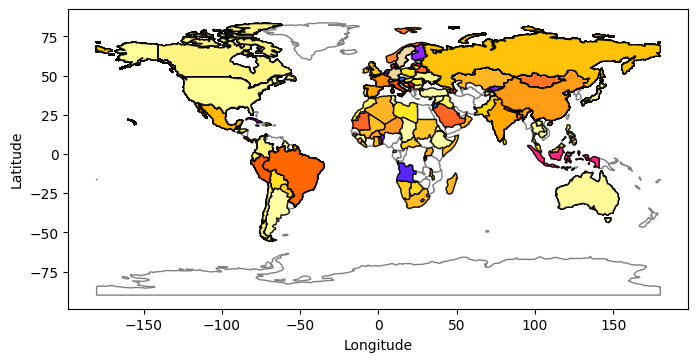

In [31]:
def least_distance(location, matrix):
    min_distance = min(((col, sum((col[i] - location[i]) ** 2 for i in range(len(col)))) for row in matrix for col in row), key=lambda x: x[1])
    return min_distance[0]


def one_instance_per_country(array):
    country_dict = {}
    for item in array:
        country = item[1]
        if country not in country_dict:
            country_dict[country] = item
    return list(country_dict.values())

def calculate_country_info(bmu_list_overtime, som_map, dataset):
    one_instance_list = one_instance_per_country(bmu_list_overtime)
    all_countries_info = []
    for item in one_instance_list:
        best_weight = least_distance(item[0], som_map)
        weight_sum = sum(best_weight)
        color = Map_colors(weight_sum)
        all_countries_info.append([item[1], color])

    countries_and_colors = []
    for country_info in all_countries_info:
        country_data = []
        try:
            country_data.append(CountryInfo(dataset['Country_Region'][country_info[0]]).iso(3))
        except KeyError:
            pass
        country_data.append(country_info[1])
        countries_and_colors.append(country_data)

    return countries_and_colors

def plot_countries_on_map(world_map, countries_and_colors, save_path=None):
    ax = world_map.plot(figsize=(8, 8), edgecolor=u'gray', color=u"white")

    for country_color_info in countries_and_colors:
        if len(country_color_info) == 1:
            continue
        else:
            country_iso = country_color_info[0]
            country_geom = world_map[world_map.iso_a3 == country_iso].__geo_interface__['features']
            if country_geom != []:
                country_geom_data = {'type': country_geom[0]['geometry']['type'], \
                    'coordinates': country_geom[0]['geometry']['coordinates']}
                ax.add_patch(PolygonPatch(country_geom_data, fc=country_color_info[1], ec="black", alpha=0.85, zorder=2))

    plt.ylabel('Latitude')
    plt.xlabel('Longitude')

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path)

    plt.show()

# Define the file path to save the map
map_save_path = "som_map.png"
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries_and_colors = calculate_country_info(bmu_list_overtime, som_map_trained, dataset)
# Plot and save the map
plot_countries_on_map(world_map, countries_and_colors, save_path=map_save_path)